In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
stock = pd.read_csv('data.csv')
stock.head()


,Date,Open,High,Low,Close,Vol
0,2012-01-01,873.0,879.0,851.0,879.0,799
1,2012-01-02,879.0,913.0,882.0,900.0,"1,002"
2,2012-01-03,900.0,916.0,892.0,892.0,"2,653"
3,2012-01-04,892.0,875.0,842.0,865.0,490
4,2012-01-05,865.0,875.0,858.0,858.0,121


In [3]:
stock['Date'].min()

'2012-01-01'

In [4]:
stock['Date'].max()

'2020-03-22'

In [5]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

In [6]:
cols = ['High', 'Low', 'Open', 'Vol']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [7]:

stock.isnull().sum()

Date     0
Close    0
dtype: int64

In [8]:
stock = stock.groupby('Date')['Close'].sum().reset_index()


In [9]:
stock.head()

,Date,Close
0,2012-01-01,879.0
1,2012-01-02,900.0
2,2012-01-03,892.0
3,2012-01-04,865.0
4,2012-01-05,858.0


In [10]:
#Indexing with time series data
stock = stock.set_index("Date")
stock.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-08', '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
       ...
       '2020-03-05', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-22'],
      dtype='object', name='Date', length=1901)

In [11]:
stock.index = pd.to_datetime(stock.index)
monthly_mean = stock.Close.resample('M').mean()

In [12]:
monthly_mean['2019']


Date
2019-01-31    839.913043
2019-02-28    800.578947
2019-03-31    706.526316
2019-04-30    792.761905
2019-05-31    842.714286
2019-06-30    815.842105
2019-07-31    802.608696
2019-08-31    782.904762
2019-09-30    765.318182
2019-10-31    763.928571
2019-11-30    748.900000
2019-12-31    721.956522
Freq: M, Name: Close, dtype: float64

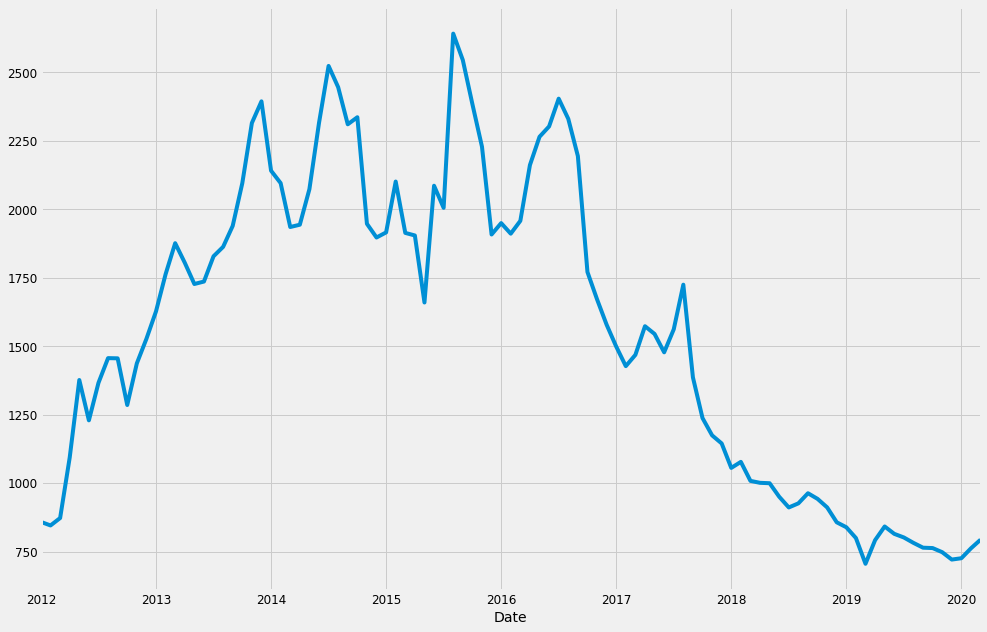

In [13]:
monthly_mean.plot(figsize = (15,10))
plt.show()

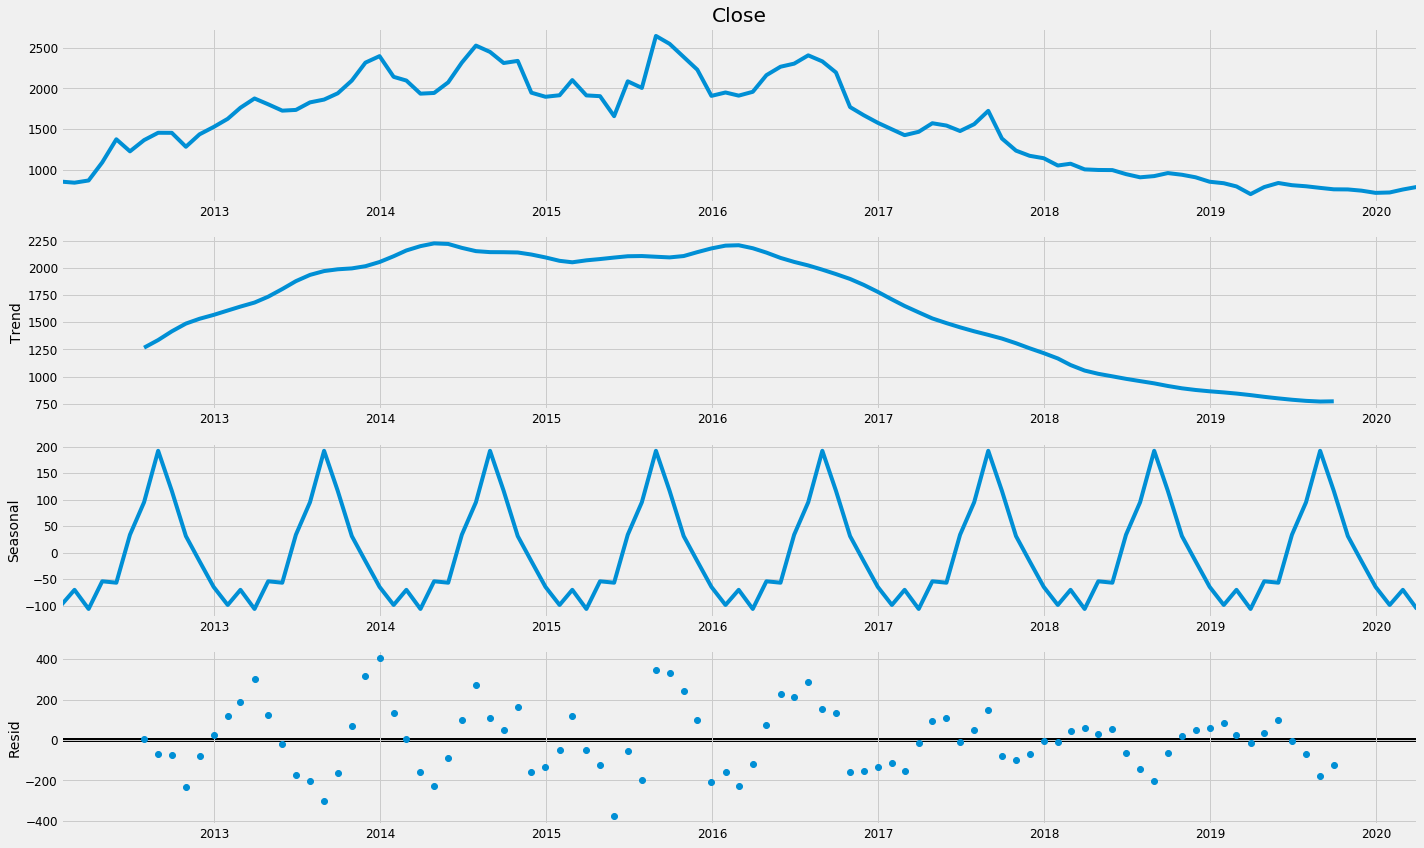

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
##testing for stationarity
from statsmodels.tsa.stattools import adfuller


In [16]:
test_result = adfuller(stock['Close'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:

adfuller_test(stock['Close'])

ADF Test Statistic : -1.7002383635904819
p-value : 0.43098966896155283
#Lags Used : 10
Number of Observations Used : 1890
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
##making data stationary by differencing
stock['Seasonal_First_Difference']=stock['Close']-stock['Close'].shift(12)


In [20]:
stock.head()

,Close,Seasonal_First_Difference
Date,,
2012-01-01,879.0,NaN
2012-01-02,900.0,NaN
2012-01-03,892.0,NaN
2012-01-04,865.0,NaN
2012-01-05,858.0,NaN


In [21]:
adfuller_test(stock['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -7.9893320627458335
p-value : 2.4989318292986973e-12
#Lags Used : 26
Number of Observations Used : 1862
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


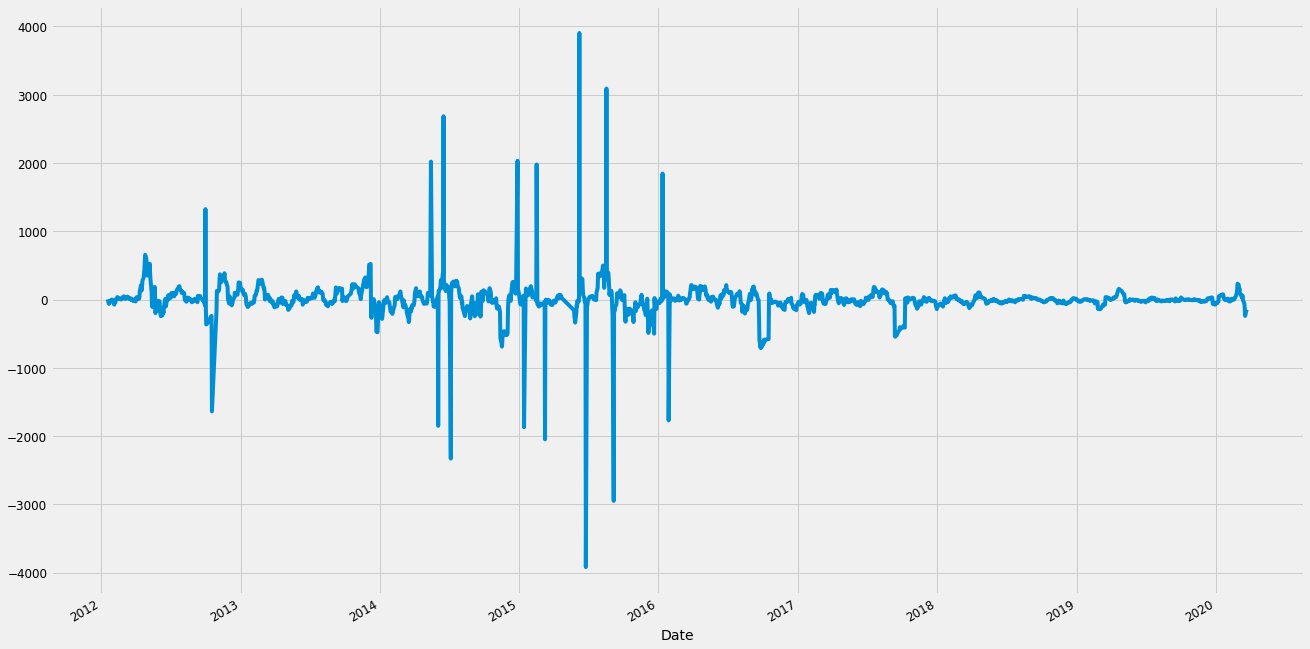

In [22]:
stock['Seasonal_First_Difference'].plot()

In [23]:
#from pandas.plotting import autocorrelation_plot 
#Autocorrelation_plot(stock['Close'])
#plt.show()

In [24]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [25]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(stock['Seasonal_First_Difference'].iloc[13:],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(stock['Seasonal_First_Difference'].iloc[13:],lags=40,ax=ax2)

In [26]:
#from statsmodels.tsa.arima_model import ARIMA

In [27]:
#model=ARIMA(stock['Close'],order=(1,1,1))
#model_fit=model.fit()

In [28]:
#model_fit.summary()

In [29]:
#stock['Forecast'] = model_fit.predict(start = 600, end = 1203, dynamic= True)
#stock[['Close','Forecast']].plot()

In [30]:
#import statsmodels.api as sm


In [31]:
#model=sm.tsa.statespace.SARIMAX(stock['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
#results=model.fit()

In [32]:
#stock['Forecast']=results.predict(start=90,end=103,dynamic=True)
#stock[['Close','Forecast']].plot(figsize=(12,8))